# **Sales Data Analysis**

## Importing Necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('C:/Users/luisp/Desktop/Biz/Datasets portefolio')

## Importing the Dataset and Showing First 5 Rows

In [3]:
df= pd.read_csv('sales_data.csv')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Age,Customer Gender,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Unit Price,Quantity,Discount,Sales,Profit
0,ORD-35455,2024-07-13,2024-07-19,Standard Class,CUST-6855,Mary Castaneda,20.0,Male,Consumer,India,...,Central,PROD-7589,Furniture,Chairs,PaleTurquoise Chairs,74.07,2,0.0,148.14,29.28
1,ORD-27340,2024-11-17,2024-11-18,Second Class,CUST-5495,Lisa Rodriguez,55.0,Female,Consumer,France,...,West,PROD-2655,Technology,Accessories,LightSkyBlue Accessories,NaN,9,0.3,3234.87,238.01
2,ORD-29692,2024-10-21,2024-10-28,Standard Class,CUST-1938,Tara Santos,24.0,Female,Consumer,India,...,South,PROD-1827,Office Supplies,Art,GoldenRod Art,81.96,6,0.0,491.76,35.99
3,ORD-56296,2025-04-18,2025-04-25,First Class,CUST-2067,Steven Johnson,58.0,Other,Home Office,United Kingdom,...,West,PROD-8200,Technology,Machines,MediumSlateBlue Machines,270.43,7,0.0,1893.01,NaN
4,ORD-15916,2024-11-21,2024-11-28,First Class,CUST-3424,Bobby Ryan,42.0,Female,Home Office,Canada,...,West,PROD-5096,Furniture,Chairs,SpringGreen Chairs,NaN,2,0.1,775.34,186.05


### Replacing Spaces with Underscores on Column Names
- This helps to prevent errors in future coding

In [4]:
df.columns= df.columns.str.replace(' ','_')
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Customer_Age,Customer_Gender,Segment,Country,...,Region,Product_ID,Category,Sub-Category,Product_Name,Unit_Price,Quantity,Discount,Sales,Profit
0,ORD-35455,2024-07-13,2024-07-19,Standard Class,CUST-6855,Mary Castaneda,20.0,Male,Consumer,India,...,Central,PROD-7589,Furniture,Chairs,PaleTurquoise Chairs,74.07,2,0.0,148.14,29.28
1,ORD-27340,2024-11-17,2024-11-18,Second Class,CUST-5495,Lisa Rodriguez,55.0,Female,Consumer,France,...,West,PROD-2655,Technology,Accessories,LightSkyBlue Accessories,NaN,9,0.3,3234.87,238.01
2,ORD-29692,2024-10-21,2024-10-28,Standard Class,CUST-1938,Tara Santos,24.0,Female,Consumer,India,...,South,PROD-1827,Office Supplies,Art,GoldenRod Art,81.96,6,0.0,491.76,35.99
3,ORD-56296,2025-04-18,2025-04-25,First Class,CUST-2067,Steven Johnson,58.0,Other,Home Office,United Kingdom,...,West,PROD-8200,Technology,Machines,MediumSlateBlue Machines,270.43,7,0.0,1893.01,NaN
4,ORD-15916,2024-11-21,2024-11-28,First Class,CUST-3424,Bobby Ryan,42.0,Female,Home Office,Canada,...,West,PROD-5096,Furniture,Chairs,SpringGreen Chairs,NaN,2,0.1,775.34,186.05


In [5]:
df.dtypes

Order_ID            object
Order_Date          object
Ship_Date           object
Ship_Mode           object
Customer_ID         object
Customer_Name       object
Customer_Age        object
Customer_Gender     object
Segment             object
Country             object
City                object
State               object
Postal_Code          int64
Region              object
Product_ID          object
Category            object
Sub-Category        object
Product_Name        object
Unit_Price         float64
Quantity            object
Discount           float64
Sales              float64
Profit             float64
dtype: object

### Changing Column Data Types
- The right data types are needed to allow calculations and plotting

In [6]:
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Ship_Date']= pd.to_datetime(df['Ship_Date'])
df['Customer_Age']= pd.to_numeric(df['Customer_Age'], errors= 'coerce')
df['Quantity']= pd.to_numeric(df['Quantity'], errors= 'coerce')

## Data Cleaning

### Starting by finding the missing values

In [7]:
print(df.isna().mean()*100)

Order_ID            0.0
Order_Date          0.0
Ship_Date           0.0
Ship_Mode           0.0
Customer_ID         0.0
Customer_Name       0.0
Customer_Age       14.4
Customer_Gender    10.0
Segment             0.0
Country             0.0
City               10.0
State               0.0
Postal_Code         0.0
Region              0.0
Product_ID          0.0
Category            0.0
Sub-Category        0.0
Product_Name        0.0
Unit_Price          5.0
Quantity            5.0
Discount           10.0
Sales               0.0
Profit             10.0
dtype: float64


### Making a Heatmap to Better Visualize the Missing Values

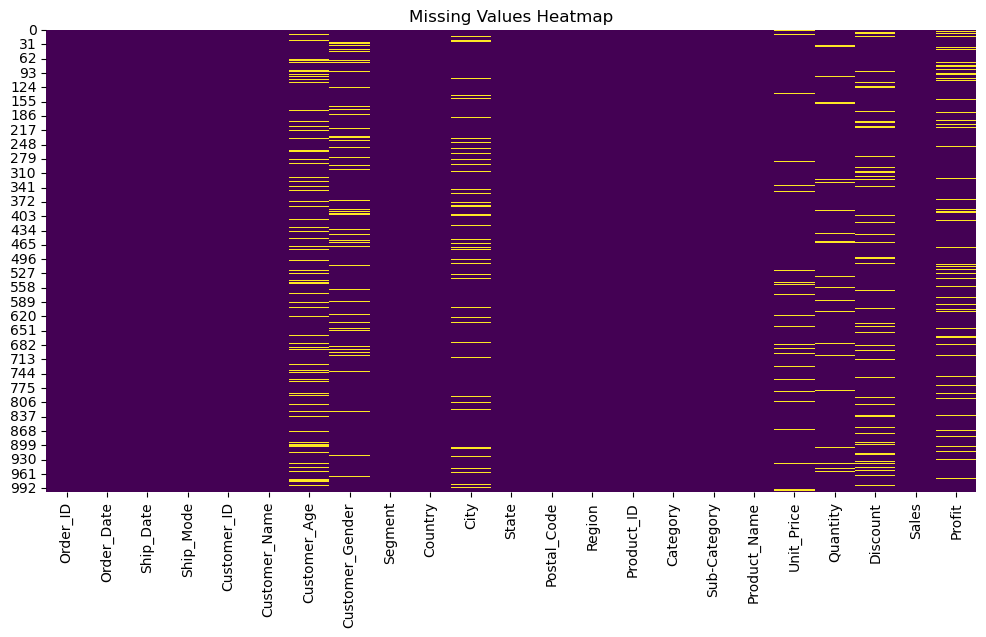

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Dropping Missing Values
- Since we don't have a big relation between missing values it's better to remove them from the dataset

In [9]:
df_clean= df.dropna()
df_clean.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Customer_Age,Customer_Gender,Segment,Country,...,Region,Product_ID,Category,Sub-Category,Product_Name,Unit_Price,Quantity,Discount,Sales,Profit
0,ORD-35455,2024-07-13,2024-07-19,Standard Class,CUST-6855,Mary Castaneda,20.0,Male,Consumer,India,...,Central,PROD-7589,Furniture,Chairs,PaleTurquoise Chairs,74.07,2.0,0.0,148.14,29.28
2,ORD-29692,2024-10-21,2024-10-28,Standard Class,CUST-1938,Tara Santos,24.0,Female,Consumer,India,...,South,PROD-1827,Office Supplies,Art,GoldenRod Art,81.96,6.0,0.0,491.76,35.99
7,ORD-61621,2024-09-12,2024-09-16,First Class,CUST-5142,Keith Russell,33.0,Other,Consumer,Canada,...,Central,PROD-5303,Furniture,Furnishings,AntiqueWhite Furnishings,200.84,8.0,0.1,1606.72,168.06
11,ORD-40891,2024-09-24,2024-09-27,Second Class,CUST-4681,Greg Wade,49.0,Male,Home Office,United States,...,Central,PROD-7577,Technology,Accessories,DarkSlateBlue Accessories,80.66,3.0,0.0,241.98,48.33
12,ORD-18355,2025-05-26,2025-05-27,First Class,CUST-3337,Richard Reed,52.0,Male,Corporate,Canada,...,West,PROD-6952,Furniture,Bookcases,Bisque Bookcases,47.40,8.0,0.0,379.20,111.67


### Checking if the Missing Values were all Dropped

In [10]:
df_clean.isna().sum()

Order_ID           0
Order_Date         0
Ship_Date          0
Ship_Mode          0
Customer_ID        0
Customer_Name      0
Customer_Age       0
Customer_Gender    0
Segment            0
Country            0
City               0
State              0
Postal_Code        0
Region             0
Product_ID         0
Category           0
Sub-Category       0
Product_Name       0
Unit_Price         0
Quantity           0
Discount           0
Sales              0
Profit             0
dtype: int64

## Creating Year and Month columns for Plotting

In [ ]:
df_clean['Year']= df_clean['Order_Date'].dt.year
df_clean['Month']= df_clean['Order_Date'].dt.month


## Data Exploration

### What was the month with the most sales? How much was earned in that month?
To find that out it's needed to:
- Group the data by month and sum the sales values
- Make a bar plot to visualize the difference between months

In [12]:
sales_month= df_clean.groupby('Month')['Sales'].sum().reset_index()
sales_month

,Month,Sales
0,1,43098.84
1,2,38501.10
2,3,65671.67
3,4,53097.55
4,5,48570.26
5,6,63406.34
6,7,45685.91
7,8,63924.65
8,9,64559.19
9,10,93735.03


C:\Users\luisp\AppData\Local\Temp\ipykernel_11912\1709000709.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


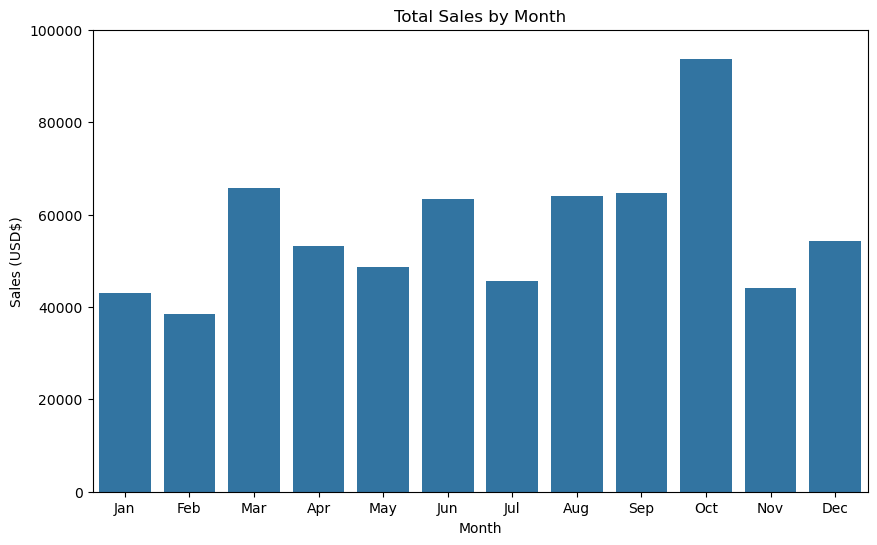

In [19]:
plt.figure(figsize=(10,6))
ax=sns.barplot(sales_month, x='Month', y='Sales')
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_ylim([0, 100000])
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales (USD$)')
plt.show()

As we can see in the plot above the best month for sales is October with a total of 93735.03$.

### In which Country were there more Sales? How much was earned in that Country?
To find that out it's needed to:
- Group the data by Country and sum the Sales values
- Make a bar plot to visualize the sales in each country

In [14]:
sales_country= df_clean.groupby('Country')['Sales'].sum().reset_index()
sales_country

,Country,Sales
0,Australia,89574.12
1,Canada,110962.29
2,France,85222.94
3,Germany,99539.60
4,India,100544.98
5,United Kingdom,80477.82
6,United States,112442.58


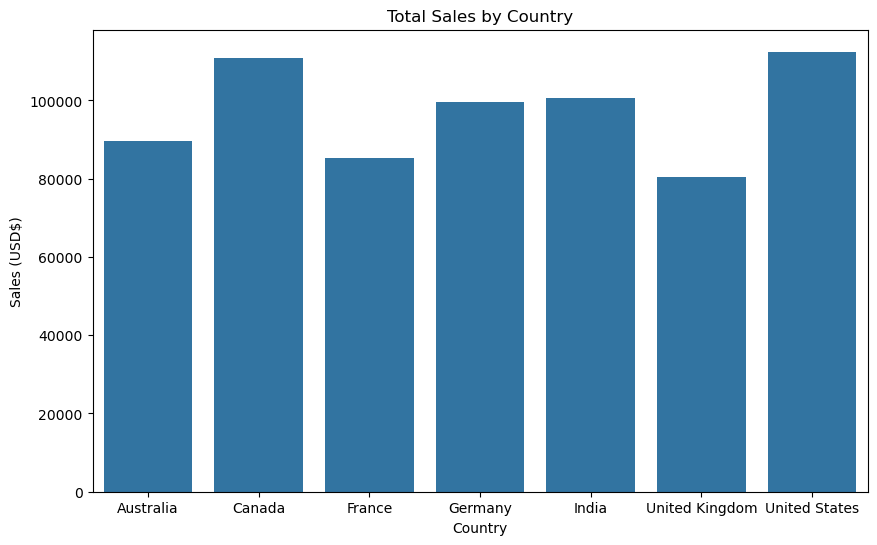

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(sales_country, x='Country', y='Sales')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales (USD$)')
plt.show()

In the plot above we see that Canada and United States are pretty similar in sales but when we look at the grouped data we see that sales were higher in the United States with a value of 112442.58$.

### Which product is the most sold? What is the quantity of that product that was sold?
To find that out it's needed to:
- Group the data by Product Name and sum the quantity
- Choose only the top 10 products for better plotting
- Make a bar plot to visualize the quantity sold of the top 10 products

In [32]:
product_sales= df_clean.groupby('Product_Name')['Quantity'].sum().reset_index()
top_product_sales = product_sales.sort_values(by='Quantity', ascending=False).head(10)
top_product_sales

,Product_Name,Quantity
391,Tomato Accessories,20.0
28,BlueViolet Phones,19.0
147,GoldenRod Art,19.0
185,LemonChiffon Bookcases,19.0
118,DeepSkyBlue Labels,18.0
367,SkyBlue Accessories,18.0
1,AntiqueWhite Chairs,18.0
327,Red Furnishings,18.0
112,DarkViolet Machines,17.0
5,Aqua Tables,17.0


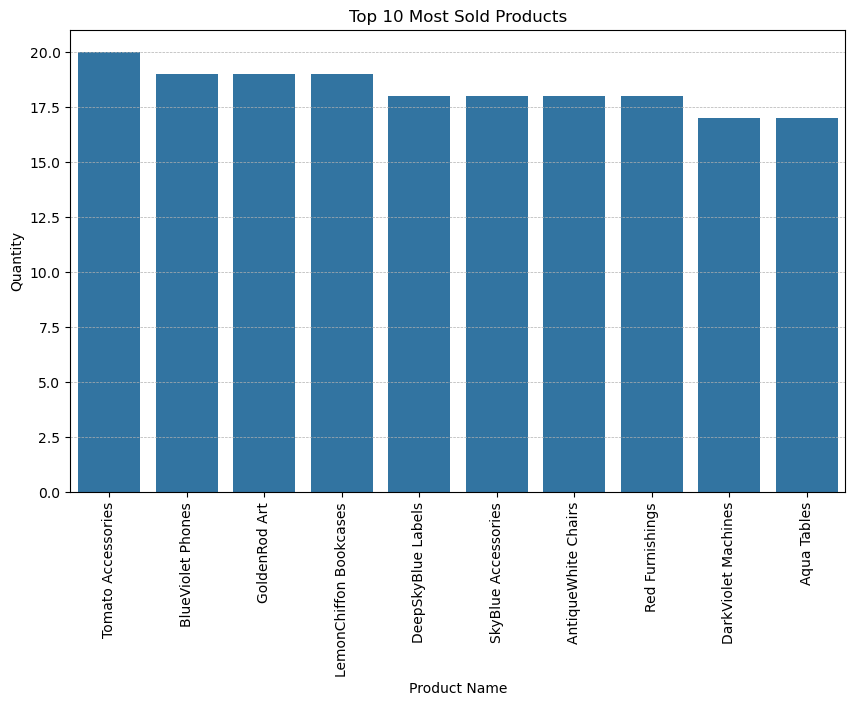

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(top_product_sales, x='Product_Name', y='Quantity')
plt.title('Top 10 Most Sold Products')
plt.xticks(rotation=90)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.show()

As we can see the most sold product is Tomato Accessories with a quantity of 20 sold.

### Which product makes the most profit? What is the profit made?
To find that out it is needed to:
- Group the data by Product Name and sum the Profit
- Choose the top 10 products for better plotting
- Make a bar plot to visualize the profit of the top 10 products

In [37]:
profit_product= df_clean.groupby('Product_Name')['Profit'].sum().reset_index()
top_profit_product= profit_product.sort_values(by= 'Profit', ascending= False).head(10)
top_profit_product

,Product_Name,Profit
5,Aqua Tables,1245.53
363,Sienna Tables,1187.70
415,WhiteSmoke Paper,1165.10
391,Tomato Accessories,1119.32
381,SteelBlue Art,1090.68
118,DeepSkyBlue Labels,1079.55
427,YellowGreen Tables,1055.12
268,MidnightBlue Art,1023.24
346,Salmon Furnishings,1004.85
379,Snow Tables,994.61


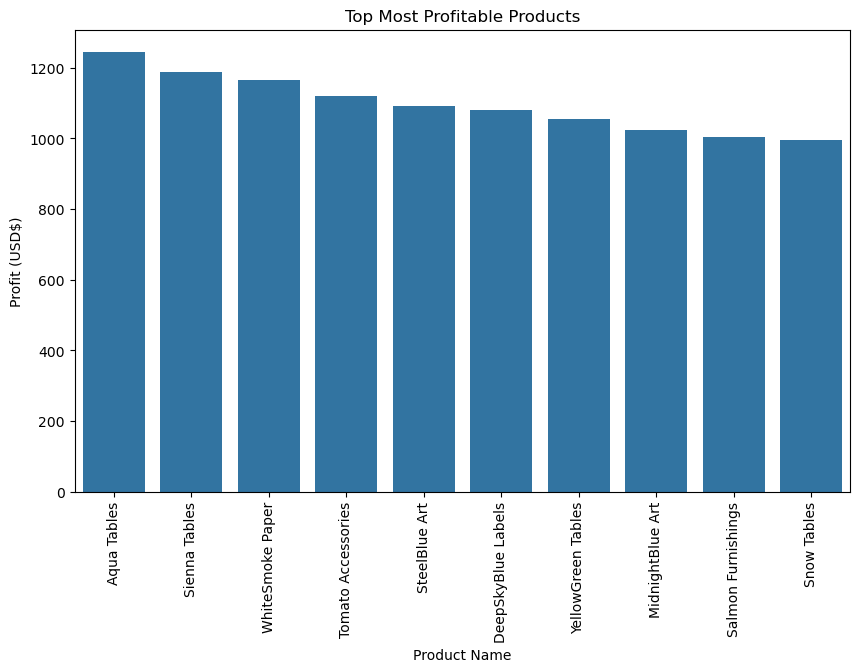

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(top_profit_product, x='Product_Name', y='Profit')
plt.title('Top Most Profitable Products')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Profit (USD$)')
plt.show()

The most profitable product was Aqua Tables with a total profit of 1245.53$.

### Which Gender is the most common between customers?
To find that out it is needed to:
- Count how many values there are for each Gender
- Make a pie chart of that data

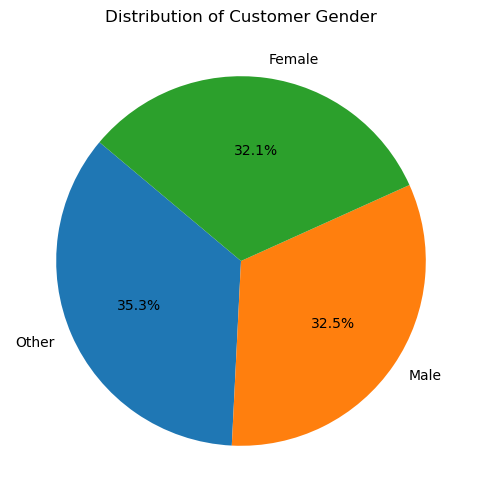

In [46]:
gender_counts= df_clean['Customer_Gender'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Gender')
plt.show()

The Gender of customers, as we can see in the plot above, is even distributed.

### Which is the more common age group among customers?
To find that out it is needed to:
- Create a column representing the age group with the age intervals
- Count how many customers are in each age group
- Make a bar plot to better visualize the data

In [50]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
df_clean['age_group'] = pd.cut(df_clean['Customer_Age'], bins=bins, labels=labels, right=False)
age_group_counts = df_clean['age_group'].value_counts().sort_index()

C:\Users\luisp\AppData\Local\Temp\ipykernel_11912\3613547164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = pd.cut(df_clean['Customer_Age'], bins=bins, labels=labels, right=False)


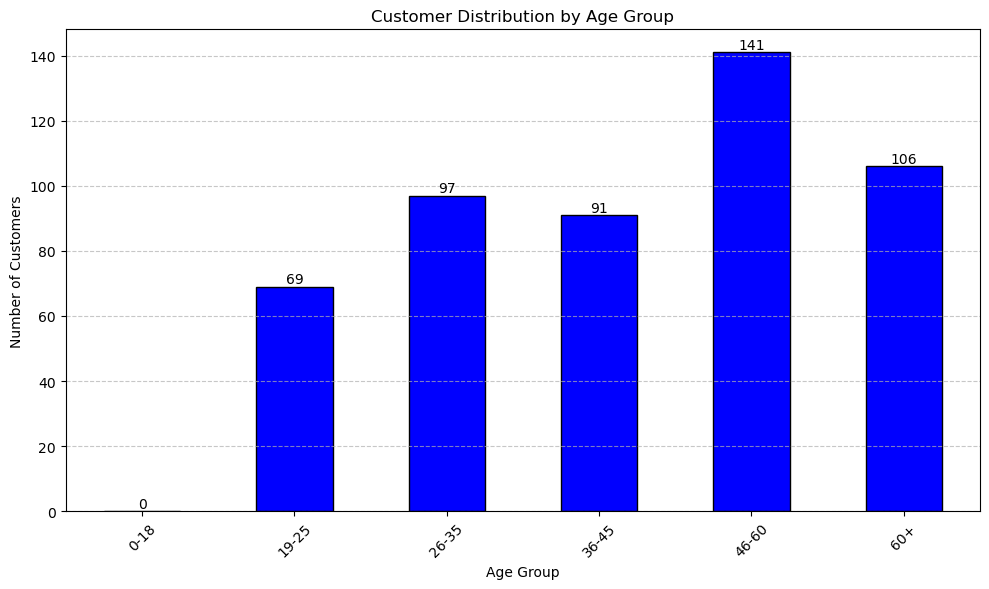

In [56]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

for i, count in enumerate(age_group_counts):
    plt.text(i, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

The most common age group is between 46 and 60 years old.

In [58]:
df_clean.to_csv('cleaned_sales_data.csv')